In [ ]:
import numpy as np
import glob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

csv_files = glob.glob('/kaggle/input/phishing-site-urls/phishing_site_urls*.csv')

#Сreating a DataFrame from the CSV file
df = pd.concat((pd.read_csv(file) for file in csv_files))
# Extract the NLP features from the URLs
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['URL'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df['URL'], test_size=0.2, random_state=42)

# Train a logistic regression model to classify phishing and legitimate URLs
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model performance on the test set
y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print('Model accuracy:', accuracy)

# Make a prediction on a new URL
new_url = 'https://www.1nstagram.com/1sAqddx'

new_url_features = vectorizer.transform([new_url])

prediction = model.predict(new_url_features)

if prediction == 1:
    print('The URL is phishing.')
else:
    print('The URL is legitimate.')

In [2]:
# Import necessary libraries
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

csv_files = glob.glob('/kaggle/input/phishing-site-urls/phishing_site_urls*.csv')
#Сreating a DataFrame from the CSV file
data = pd.concat((pd.read_csv(file) for file in csv_files))
# Split the dataset into features (URLs) and labels (phishing or not)
X = data['URL']
y = data['Label']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the URLs using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 0.9693000819149904
Confusion Matrix:
[[28935  2265]
 [ 1108 77562]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.96      0.93      0.94     31200
        good       0.97      0.99      0.98     78670

    accuracy                           0.97    109870
   macro avg       0.97      0.96      0.96    109870
weighted avg       0.97      0.97      0.97    109870



In [5]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

csv_files = glob.glob('/kaggle/input/phishing-site-urls/phishing_site_urls*.csv')
data = pd.concat((pd.read_csv(file) for file in csv_files))

# Splitting the dataset into URL and labels 
X = data['URL']
y = data['Label']

# Splitting the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing URLs
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# Trainning a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
acc = accuracy_score(y_test, y_pred)
rep = classification_report(y_test, y_pred)

print(f'Accuracy: {acc}')
print('Report:')
print(rep)

Accuracy: 0.9693000819149904
Report:
              precision    recall  f1-score   support

         bad       0.96      0.93      0.94     31200
        good       0.97      0.99      0.98     78670

    accuracy                           0.97    109870
   macro avg       0.97      0.96      0.96    109870
weighted avg       0.97      0.97      0.97    109870



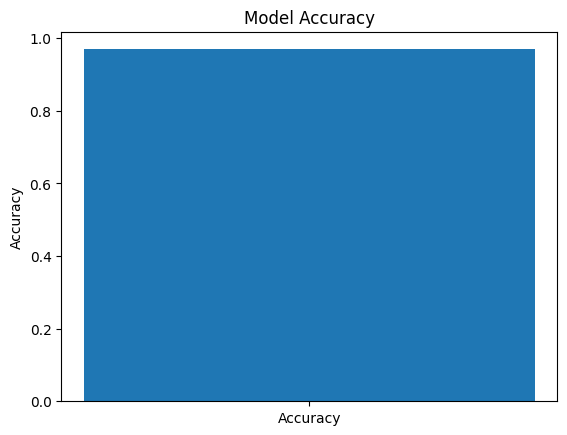

In [1]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

csv_files = glob.glob('/kaggle/input/phishing-site-urls/phishing_site_urls*.csv')
data = pd.concat((pd.read_csv(file) for file in csv_files))

# Splitting the dataset into URL and labels
X = data['URL']
y = data['Label']

# Splitting the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing URLs
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# Training a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
acc = accuracy_score(y_test, y_pred)

# Create a bar chart to visualize accuracy
labels = ['Accuracy']
values = [acc]

plt.bar(labels, values)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


Results:
     Metric   Value
0  Accuracy  0.9693


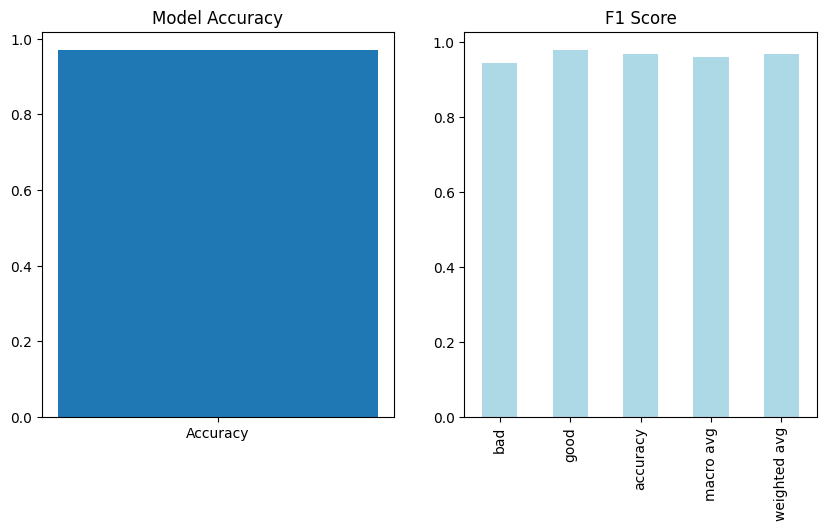

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

# Your existing code here

# Create a DataFrame for results
results = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Value': [acc]
})

# Create a bar chart to visualize accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar('Accuracy', acc)
plt.title('Model Accuracy')

# Display the classification report as a DataFrame
classification_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

# Display the results
print("Results:")
print(results)

plt.subplot(1, 2, 2)
classification_df['f1-score'].plot(kind='bar', color='lightblue')
plt.title('F1 Score')

plt.show()
plt.savefig("diagram.pdf", format="pdf")

In [6]:
plt.savefig("pie_chart.png", format="png")

<Figure size 640x480 with 0 Axes>

Results:


NameError: name 'results' is not defined

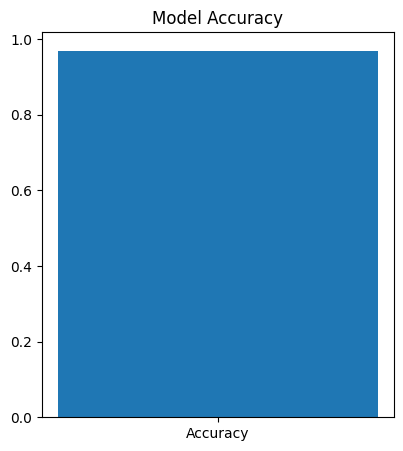

In [8]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

csv_files = glob.glob('/kaggle/input/phishing-site-urls/phishing_site_urls*.csv')
data = pd.concat((pd.read_csv(file) for file in csv_files))

# Splitting the dataset into URL and labels
X = data['URL']
y = data['Label']

# Splitting the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing URLs
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# Training a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
acc = accuracy_score(y_test, y_pred)

\textbf{Input:} List of CSV files containing URL data

